# Basic Example for Calculating the Causal Effect
This is a quick introduction to the DoWhy causal inference library.
We will load in a sample dataset and estimate the causal effect of a (pre-specified) treatment variable on a (pre-specified) outcome variable.

First, let us load all required packages.

In [242]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets 

Now, let us load a dataset. For simplicity, we simulate a dataset with linear relationships between common causes and treatment, and common causes and outcome. 

Beta is the true causal effect. 

data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000, 
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [243]:
import pandas as pd

In [244]:
df = pd.read_csv("onvm_global_two_stresses_bk.csv").fillna(0.0)

In [245]:
df.head()

,Unnamed: 0,input_rate,output_rate,latency,firewall,router,ndpi_stat,payload_scan,bridge,firewall_drop,router_drop,ndpi_stat_drop,payload_scan_drop,bridge_drop,firewall_cycles,bridge_cycles,ndpi_stat_cycles,nf_router_cycles,payload_scan_cycles
0,0,0.000364,0.099282,0.169867,0.021556,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.163335,0.215950,0.000000,0.000000
1,1,0.000098,0.098937,0.002302,0.021079,0.023820,0.023819,0.023815,0.023809,1.0,0.0,0.0,0.0,0.0,0.756862,0.971274,0.948465,0.937346,0.903236
2,2,0.000021,0.099038,0.526335,0.021231,0.023338,0.023347,0.023334,0.023327,1.0,0.0,0.0,0.0,0.0,0.984728,0.999291,0.999403,0.998003,0.998319
3,3,0.000292,0.099239,1.000000,0.021460,0.023493,0.023492,0.023487,0.023481,1.0,0.0,0.0,0.0,0.0,0.997237,0.999688,0.999260,0.998944,0.999750
4,4,0.000000,0.098770,0.063378,0.020911,0.023718,0.023723,0.023721,0.023717,1.0,0.0,0.0,0.0,0.0,0.997708,0.999769,0.999734,0.998794,0.998358


Note that we are using a pandas dataframe to load the data. At present, DoWhy only supports pandas dataframe as input.

## Interface 1 (recommended): Input causal graph

We now input a causal graph in the GML graph format (recommended). You can also use the DOT format.

To create the causal graph for your dataset, you can use a tool like [DAGitty](http://dagitty.net/dags.html#) that provides a GUI to construct the graph. You can export the graph string that it generates. The graph string is very close to the DOT format: just rename `dag` to `digraph`, remove newlines and add a semicolon after every line, to convert it to the DOT format and input to DoWhy. 

# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

In [246]:
gml_0 = """graph[
    directed 1
    node[ id "input_rate" label "input_rate"]
    node[ id "output_rate" label "output_rate"]
    node[ id "latency" label "latency"]
    node[ id "bridge" label "bridge"]
    node[ id "bridge_cycles" label "bridge_cycles"]
    node[ id "firewall" label "firewall"]
    node[ id "firewall_cycles" label "firewall_cycles"]
    node[ id "ndpi_stat" label "ndpi_stat"]
    node[ id "ndpi_stat_cycles" label "ndpi_stat_cycles"]
    node[ id "router" label "router"]
    node[ id "router_cycles" label "router_cycles"]
    node[ id "payload_scan" label "payload_scan"]
    node[ id "payload_scan_cycles" label "payload_scan_cycles"]
    edge[source "input_rate" target "firewall"]
    edge[source "firewall" target "ndpi_stat"]
    edge[source "ndpi_stat" target "router"]
    edge[source "router" target "payload_scan"]
    edge[source "payload_scan" target "bridge"]
    edge[source "bridge" target "output_rate"]
    edge[source "bridge" target "latency"]
    edge[source "firewall_cycles" target "firewall"]
    edge[source "bridge_cycles" target "bridge"]
    edge[source "router_cycles" target "router"]
    edge[source "ndpi_stat_cycles" target "ndpi_stat"]
    edge[source "payload_scan_cycles" target "payload_scan"]
]"""

In [247]:
gml = """graph[
    directed 1
    node[ id "input_rate" label "input_rate"]
    node[ id "output_rate" label "output_rate"]
    node[ id "latency" label "latency"]
    node[ id "bridge" label "bridge"]
    node[id "bridge_cycles" label "bridge_cycles"]
    node[ id "firewall" label "firewall"]
    node[ id "firewall_cycles" label "firewall_cycles"]
    node[ id "ndpi_stat" label "ndpi_stat"]
    node[ id "ndpi_stat_cycles" label "ndpi_stat_cycles"]
    node[ id "router" label "router"]
    node[ id "nf_router_cycles" label "nf_router_cycles"]
    node[ id "payload_scan" label "payload_scan"]
    node[ id "payload_scan_cycles" label "payload_scan_cycles"]
    node[ id "firewall_drop" label "firewall_drop"]
    node[ id "bridge_drop" label "bridge_drop"]
    node[ id "payload_scan_drop" label "payload_scan_drop"]
    node[ id "router_drop" label "router_drop"]
    node[ id "ndpi_stat_drop" label "ndpi_stat_drop"]
    node[ id "Unobserved" label "Unobserved"]
    edge[source "input_rate" target "firewall"]
    edge[source "firewall" target "ndpi_stat"]
    edge[source "ndpi_stat" target "router"]
    edge[source "router" target "payload_scan"]
    edge[source "payload_scan" target "bridge"]
    edge[source "bridge" target "output_rate"]
    edge[source "bridge" target "latency"]
    edge[source "firewall_cycles" target "firewall"]
    edge[source "bridge_cycles" target "bridge"]
    edge[source "nf_router_cycles" target "router"]
    edge[source "ndpi_stat_cycles" target "ndpi_stat"]
    edge[source "payload_scan_cycles" target "payload_scan"]
    edge[source "Unobserved" target "bridge_cycles"]
    edge[source "Unobserved" target "firewall_cycles"]
    edge[source "Unobserved" target "ndpi_stat_cycles"]
    edge[source "Unobserved" target "nf_router_cycles"]
    edge[source "Unobserved" target "payload_scan_cycles"]
    edge[source "input_rate" target "firewall_drop"]
    edge[source "firewall_cycles" target "firewall_drop"]
    edge[source "bridge_cycles" target "bridge_drop"]
    edge[source "payload_scan_cycles" target "payload_scan_drop"]
    edge[source "nf_router_cycles" target "router_drop"]
    edge[source "ndpi_stat_cycles" target "ndpi_stat_drop"]
    edge[source "firewall" target "ndpi_stat_drop"]
    edge[source "ndpi_stat" target "router_drop"]
    edge[source "router" target "payload_scan_drop"]
    edge[source "payload_scan" target "bridge_drop"]
    edge[source "firewall_drop" target "latency"]
    edge[source "ndpi_stat_drop" target "latency"]
    edge[source "router_drop" target "latency"]
    edge[source "payload_scan_drop" target "latency"]
    edge[source "bridge_drop" target "latency"]
]"""

In [248]:
data = df[["input_rate", "output_rate", "latency", 
           "firewall_cycles", "firewall",
           "payload_scan", "payload_scan_cycles",
           "bridge", "bridge_cycles",
           "router", "nf_router_cycles",
          ]]
data

,input_rate,output_rate,latency,firewall_cycles,firewall,payload_scan,payload_scan_cycles,bridge,bridge_cycles,router,nf_router_cycles
0,0.000364,0.099282,0.169867,0.000000,0.021556,0.000000,0.000000,0.000000,0.163335,0.000000,0.000000
1,0.000098,0.098937,0.002302,0.756862,0.021079,0.023815,0.903236,0.023809,0.971274,0.023820,0.937346
2,0.000021,0.099038,0.526335,0.984728,0.021231,0.023334,0.998319,0.023327,0.999291,0.023338,0.998003
3,0.000292,0.099239,1.000000,0.997237,0.021460,0.023487,0.999750,0.023481,0.999688,0.023493,0.998944
4,0.000000,0.098770,0.063378,0.997708,0.020911,0.023721,0.998358,0.023717,0.999769,0.023718,0.998794
...,...,...,...,...,...,...,...,...,...,...,...
77,0.936558,0.928117,0.005252,0.997875,0.931858,0.925988,0.999189,0.925981,0.999799,0.925990,0.997912
78,0.938648,0.328567,0.002261,0.996601,0.373157,0.932008,0.999086,0.932002,0.999800,0.932014,0.998907
79,0.939394,0.000951,0.002675,0.997898,0.139871,0.300335,0.997289,0.294885,0.999335,0.369709,0.994028
80,0.940002,0.001284,0.003561,0.997966,0.139584,0.041901,0.998777,0.041895,0.563964,0.143040,0.998381


In [249]:
model=CausalModel(
        data = data,
        treatment=["router"],
        outcome="output_rate",
        graph=gml
        )

In [250]:
model.view_model()

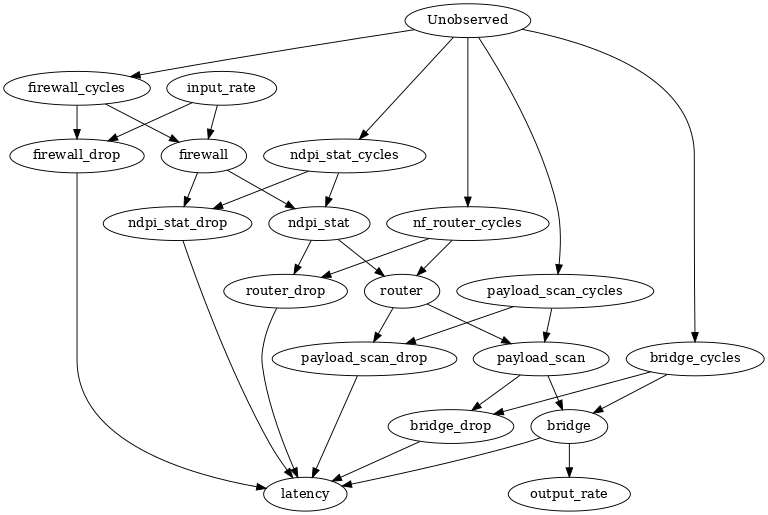

In [251]:
from IPython.display import Image, display
display(Image(filename="causal_model.png", width=400))

The above causal graph shows the assumptions encoded in the causal model. We can now use this graph to first identify 
the causal effect (go from a causal estimand to a probability expression), and then estimate the causal effect.

### DoWhy philosophy: Keep identification and estimation separate

Identification can be achieved without access to the data, acccesing only the graph. This results in an expression to be computed. This expression can then be evaluated using the available data in the estimation step.
It is important to understand that these are orthogonal steps.

#### Identification

In [252]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=False)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                      
─────────(E[output_rate|bridge_cycles,payload_scan_cycles])
d[router]                                                  
Estimand assumption 1, Unconfoundedness: If U→{router} and U→output_rate then P(output_rate|router,bridge_cycles,payload_scan_cycles,U) = P(output_rate|router,bridge_cycles,payload_scan_cycles)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡    d                     d              ⎤
E⎢─────────(outputᵣₐₜₑ)⋅─────────([bridge])⎥
 ⎣d[bridge]             d[router]          ⎦
Estimand assumption 1, Full-mediation: bridge intercepts (blocks) all directed paths from router to o,u,t,p,u,t,_,r,a,t,e.
Estimand assumption 2, First-stage-unconfoundedness: If U→{router} and U→{bridge} then P(bridge|router,U) = P(bridge|router)
Estiman

Note the parameter flag *proceed\_when\_unidentifiable*. It needs to be set to *True* to convey the assumption that we are ignoring any unobserved confounding. The default behavior is to prompt the user to double-check that the unobserved confounders can be ignored. 

#### Estimation methods:

In [253]:
# Other available backdoor methods: distance_matching, propensity_score_stratification, 
# propensity_score_matching, propensity_score_weighting. @ Discretize the treatment.

causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True)
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                      
─────────(E[output_rate|bridge_cycles,payload_scan_cycles])
d[router]                                                  
Estimand assumption 1, Unconfoundedness: If U→{router} and U→output_rate then P(output_rate|router,bridge_cycles,payload_scan_cycles,U) = P(output_rate|router,bridge_cycles,payload_scan_cycles)

## Realized estimand
b: output_rate~router+bridge_cycles+payload_scan_cycles+router*bridge_cycles+router*payload_scan_cycles
Target units: ate

## Estimate
Mean value: 0.7775347407543529



In [254]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="bootstrap_refuter")
print(ref)

Refute: Bootstrap Sample Dataset
Estimated effect:0.7775347407543529
New effect:0.8408936070496016
p value:0.48



In [255]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="data_subset_refuter")
print(ref)

Refute: Use a subset of data
Estimated effect:0.7775347407543529
New effect:0.8133385085602682
p value:1.0



In [256]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="dummy_outcome_refuter")
print(ref[0])

Refute: Use a Dummy Outcome
Estimated effect:0
New effect:-0.08676338733778116
p value:0.8999999999999999



In [257]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(ref)

Refute: Add a random common cause
Estimated effect:0.7775347407543529
New effect:0.7783489398930241
p value:0.9



ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="placebo_treatment_refuter", placebo_type="permute")
print(ref)

In [258]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="frontdoor.linear_regression")
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: frontdoor
Estimand expression:
 ⎡    d                     d              ⎤
E⎢─────────(outputᵣₐₜₑ)⋅─────────([bridge])⎥
 ⎣d[bridge]             d[router]          ⎦
Estimand assumption 1, Full-mediation: bridge intercepts (blocks) all directed paths from router to o,u,t,p,u,t,_,r,a,t,e.
Estimand assumption 2, First-stage-unconfoundedness: If U→{router} and U→{bridge} then P(bridge|router,U) = P(bridge|router)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{bridge} and U→output_rate then P(output_rate|bridge, router, U) = P(output_rate|bridge, router)

## Realized estimand
b: output_rate~router+bridge_cycles+payload_scan_cycles+router*bridge_cycles+router*payload_scan_cycles
Target units: ate

## Estimate
Mean value: 0.7775347407543529



In [259]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="bootstrap_refuter")
print(ref)

Refute: Bootstrap Sample Dataset
Estimated effect:0.7775347407543529
New effect:0.8265729402112479
p value:0.58



In [260]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="data_subset_refuter")
print(ref)

Refute: Use a subset of data
Estimated effect:0.7775347407543529
New effect:0.8076725843742344
p value:0.8400000000000001



In [261]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="dummy_outcome_refuter")
print(ref[0])

Refute: Use a Dummy Outcome
Estimated effect:0
New effect:0.12473592288153565
p value:0.94



In [262]:
ref = model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(ref)

Refute: Add a random common cause
Estimated effect:0.7775347407543529
New effect:0.7775347407543528
p value:2.0



You can input additional parameters to the estimate_effect method. For instance, to estimate the effect on any subset of the units, you can specify the "target_units" parameter which can be a string ("ate", "att", or "atc"), lambda function that filters rows of the data frame, or a new dataframe on which to compute the effect. You can also specify "effect modifiers" to estimate heterogeneous effects across these variables. See `help(CausalModel.estimate_effect)`. 

In [263]:
# Step 3: Estimate
#Choose the second estimand: using IV
estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", test_significance=True)
print(estimate)

Estimation failed! No relevant identified estimand available for this estimation method.


In [264]:
causal_estimate_regdist = model.estimate_effect(identified_estimand,
        method_name="iv.regression_discontinuity", 
        method_params={'rd_variable_name':'input_rate',
                       'rd_threshold_value':0.5,
                       'rd_bandwidth': 0.15})
print(causal_estimate_regdist)
print("Causal Estimate is " + str(causal_estimate_regdist.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None


In [265]:
causal_estimate_regdist = model.estimate_effect(identified_estimand,
        method_name="iv.regression_discontinuity", 
        method_params={'rd_variable_name':'firewall_cycles',
                       'rd_threshold_value':0.5,
                       'rd_bandwidth': 0.15})
print(causal_estimate_regdist)
print("Causal Estimate is " + str(causal_estimate_regdist.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None
